In [10]:
import dataset
from config import base_path,data_path
import matplotlib.pyplot as plt

def get_population_list():
    '''
    Create a list of neuron population names, 
    where each name represents a combination of a neuron type and a layer type.
    '''
    
    pop_list = []
    neuron_types = ["E","S","P","V"]
    layer_types = ["1","23","4","5","6"]
    for layer_type in layer_types:
        if layer_type == "1":
            pop_list.append("H1")
        else:
            for neuron_type in neuron_types:
                pop_list.append(neuron_type+layer_type)
    return pop_list

def get_population_list_TH():
    '''
    Create a list of neuron population names of TH, 
    where each name represents a combination of a neuron type and a layer type.
    '''    
    
    pop_list = []
    neuron_types = ["E","S","P","V"]
    layer_types = ["1","23","5","6"]
    for layer_type in layer_types:
        if layer_type == "1":
            pop_list.append("H1")
        else:
            for neuron_type in neuron_types:
                pop_list.append(neuron_type+layer_type)
    return pop_list

pop_list_norm = get_population_list()
pop_list_TH = get_population_list_TH()

In [7]:
param_name = 'S5'
block_id = 5
with dataset.connect(f'sqlite:///{data_path}/dataset.db') as db:
    if len(list(db[param_name].find(param_value=block_id)))>0:
        print("{} of {} has been simulated".format(param_name,block_id))


S5 of 5 has been simulated


In [10]:
param_name = 'S5'
block_id = 5
with dataset.connect(f'sqlite:///{data_path}/dataset.db') as db:
    if len(list(db[param_name].find(param_value=block_id)))>0:
        print("{} of {} has been simulated".format(param_name,block_id))

S5 of 5 has been simulated


In [ ]:
with dataset.connect(f'sqlite:///{data_path}/dataset.db') as db:
    i = 0
    # param_name = 'S5'
    # for input_pop in pop_list_norm:
        
    input_pop = 'S5'
    if True:
        
        for param_name in pop_list_norm:
            value_k_list = []
            rate_k_list = []
            for k in range(10):
                if len(list(db[input_pop].find(param_value=block_id)))>0:
                    value_k_list.append(k)
                    value_k = db[input_pop].find(param_value=block_id)
                    for row in value_k:
                        rate_k_list.append(row[param_name])
                        print("param_value=",row["param_value"])
                        rate_dict = {param_name : row[param_name] for param_name in pop_list_norm}
                        print(rate_dict)
                        i = i + 1
    
    print("i=",i)

param_value= 5
{'H1': 0.0, 'E23': 0.0009277513626348139, 'S23': 1.7674418604651163, 'P23': 0.0, 'V23': 0.0, 'E4': 0.21365753406376362, 'S4': 0.0, 'P4': 0.9273838283359386, 'V4': 4.158134820070958, 'E5': 0.0, 'S5': 16.770491803278688, 'P5': 0.0, 'V5': 0.0, 'E6': 0.06016372423315909, 'S6': 0.6070785842831433, 'P6': 0.7995169082125604, 'V6': 0.7152317880794702}
param_value= 5
{'H1': 0.0, 'E23': 0.0009277513626348139, 'S23': 1.7674418604651163, 'P23': 0.0, 'V23': 0.0, 'E4': 0.21365753406376362, 'S4': 0.0, 'P4': 0.9273838283359386, 'V4': 4.158134820070958, 'E5': 0.0, 'S5': 16.770491803278688, 'P5': 0.0, 'V5': 0.0, 'E6': 0.06016372423315909, 'S6': 0.6070785842831433, 'P6': 0.7995169082125604, 'V6': 0.7152317880794702}
param_value= 5
{'H1': 0.0, 'E23': 0.0009277513626348139, 'S23': 1.7674418604651163, 'P23': 0.0, 'V23': 0.0, 'E4': 0.21365753406376362, 'S4': 0.0, 'P4': 0.9273838283359386, 'V4': 4.158134820070958, 'E5': 0.0, 'S5': 16.770491803278688, 'P5': 0.0, 'V5': 0.0, 'E6': 0.06016372423315

In [12]:
with dataset.connect(f'sqlite:///{data_path}/dataset.db') as db:
    for input_pop in pop_list_norm:
        for row in db[input_pop]:
            row['param_value'] = row.pop('param_value')

In [12]:
import matplotlib.pyplot as plt

# 连接数据库并提取数据
with dataset.connect(f'sqlite:///{data_path}/dataset.db') as db:
    for input_pop in pop_list_norm:
        print("input_pop=",input_pop)
        for param_name in pop_list_norm:
            value_k_list = []
            rate_k_list = []

            # 遍历 k 值
            for k in range(10):
                if len(list(db[input_pop].find(param_value=k))) > 0:
                    # value_k_list.append(k)
                    value_k = db[input_pop].find(param_value=k)
                    for row in value_k:
                        # if row[param_name] < 100:
                        if True:
                            value_k_list.append(k)
                            rate_k_list.append(row[param_name])

            # print("rate_k=",rate_k_list)
        
            plt.plot(value_k_list, rate_k_list,label=f'{param_name} Rate')
            # 可视化图像
            # plt.figure(figsize=(10, 6))
        # plt.show()
        plt.title("Variation of discharge rate of V1 neurons with {}'s current input".format(input_pop))
        plt.savefig('/home/liugangqiang/fig/variation of rate with {}'.format(input_pop))
        plt.close()

input_pop= H1
input_pop= E23
input_pop= S23
input_pop= P23
input_pop= V23
input_pop= E4
input_pop= S4
input_pop= P4
input_pop= V4
input_pop= E5
input_pop= S5
input_pop= P5
input_pop= V5
input_pop= E6
input_pop= S6
input_pop= P6
input_pop= V6


In [16]:
for input_pop in pop_list_norm:
    # print("input_pop=",input_pop)
    # print("neu_type=",input_pop[0])
    print("layer=",input_pop[1:])

layer= 1
layer= 23
layer= 23
layer= 23
layer= 23
layer= 4
layer= 4
layer= 4
layer= 4
layer= 5
layer= 5
layer= 5
layer= 5
layer= 6
layer= 6
layer= 6
layer= 6


In [12]:
import re

for pop in pop_list_norm:

    # 字符串
    text = pop+"_connection"

    # 正则表达式模式，用于匹配'_connection'前的部分
    pattern = r'^(.+?)_connection$'

    # 使用re.match尝试从字符串的开头匹配模式
    match = re.match(pattern, text)

    if match:
        print('Match found:', match.group(1)) # match.group(1)会给出第一个捕获组的内容，即'H1'
    else:
        print('No match')

Match found: H1
Match found: E23
Match found: S23
Match found: P23
Match found: V23
Match found: E4
Match found: S4
Match found: P4
Match found: V4
Match found: E5
Match found: S5
Match found: P5
Match found: V5
Match found: E6
Match found: S6
Match found: P6
Match found: V6


In [10]:
print(pop_list_norm)

['H1', 'E23', 'S23', 'P23', 'V23', 'E4', 'S4', 'P4', 'V4', 'E5', 'S5', 'P5', 'V5', 'E6', 'S6', 'P6', 'V6']


In [8]:
text = 'H1_connection'
if 'connection' in text:
    print("connection")

connection


input_pop= H1
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 5
k= 6
k= 7
k= 8
k= 9


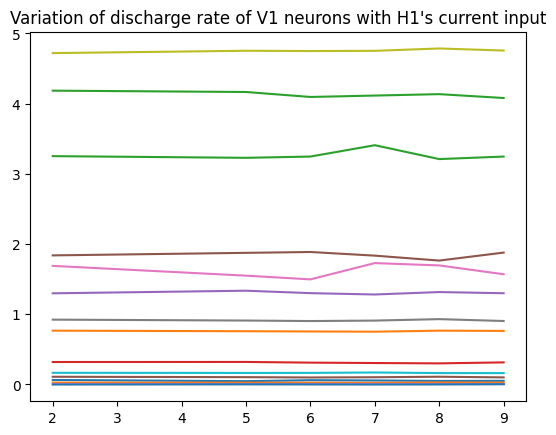

input_pop= E23
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9


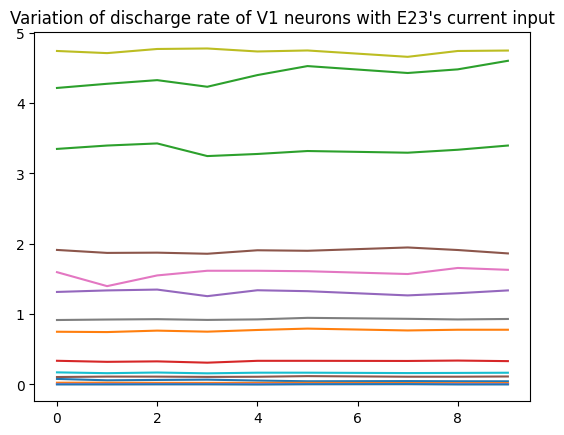

input_pop= S23
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


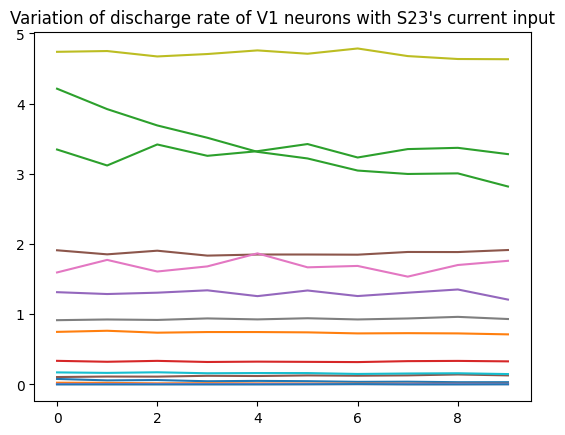

input_pop= P23
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


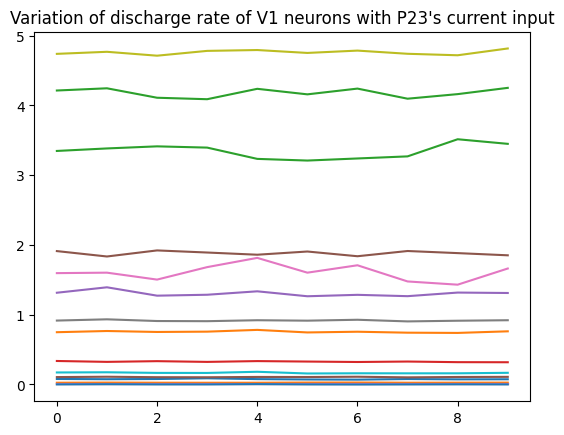

input_pop= V23
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


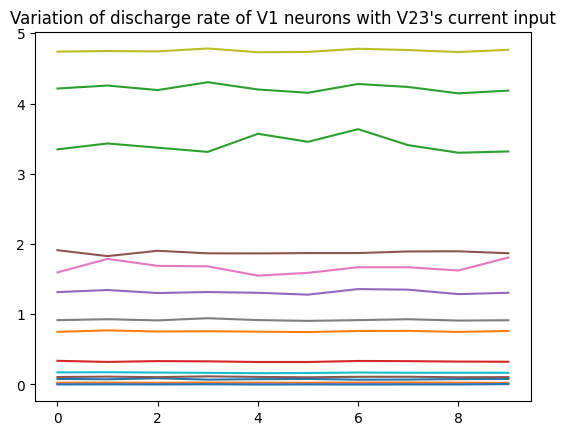

input_pop= E4
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


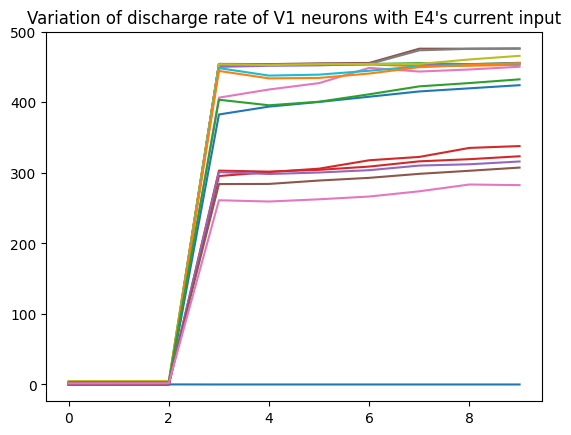

input_pop= S4
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


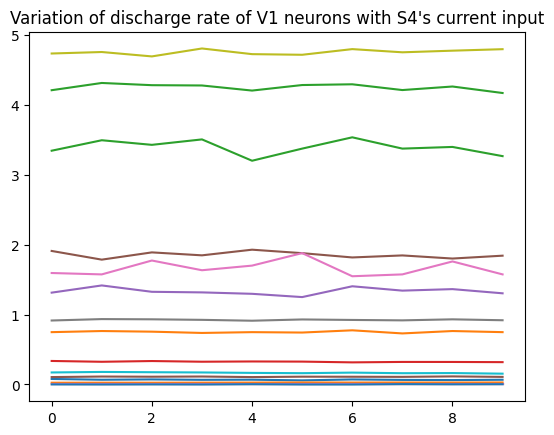

input_pop= P4
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 2
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


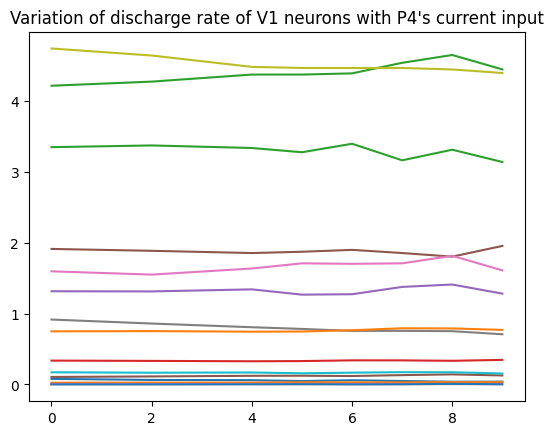

input_pop= V4
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


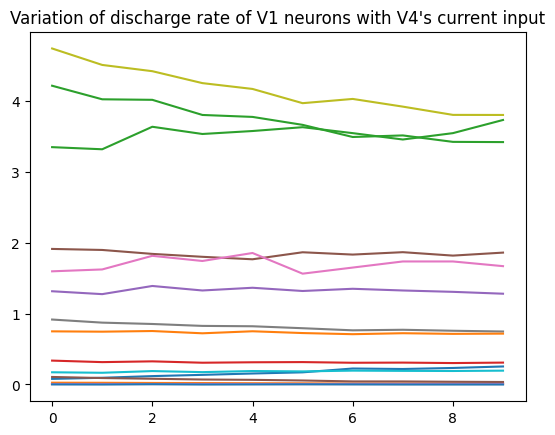

input_pop= E5
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


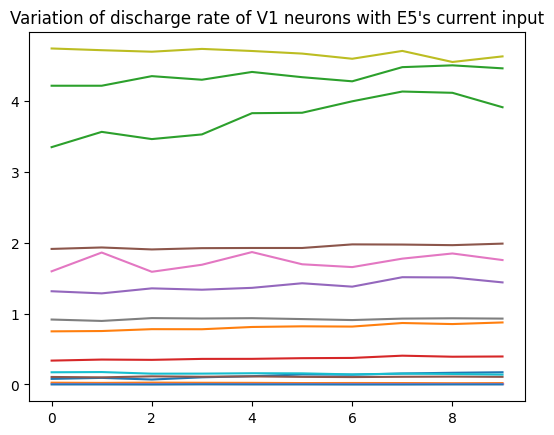

input_pop= S5
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


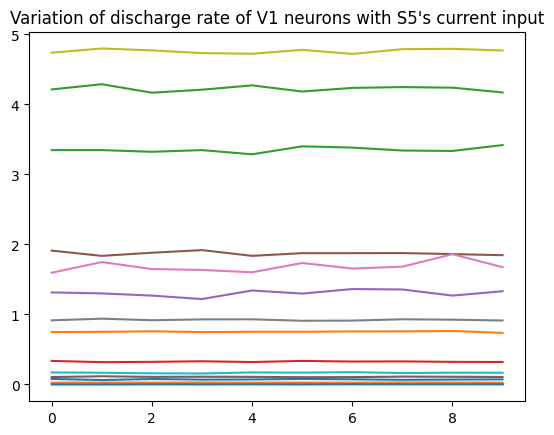

input_pop= P5
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 7
k= 8
k= 9


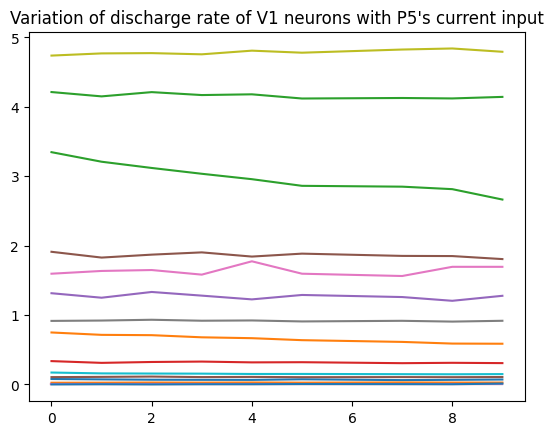

input_pop= V5
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


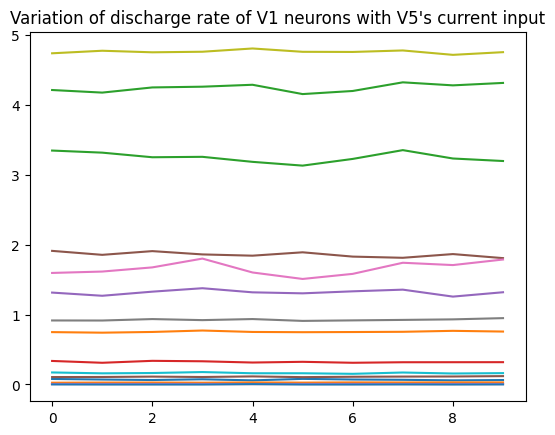

input_pop= E6
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


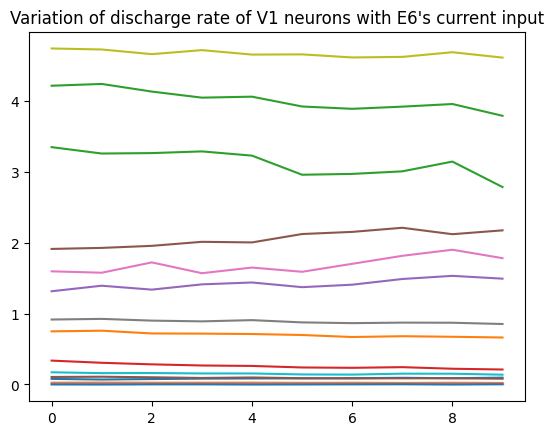

input_pop= S6
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


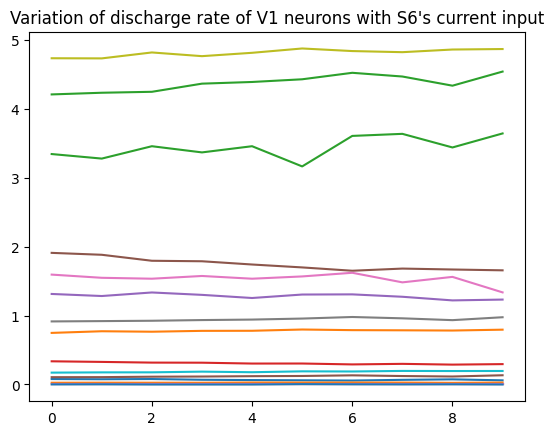

input_pop= P6
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


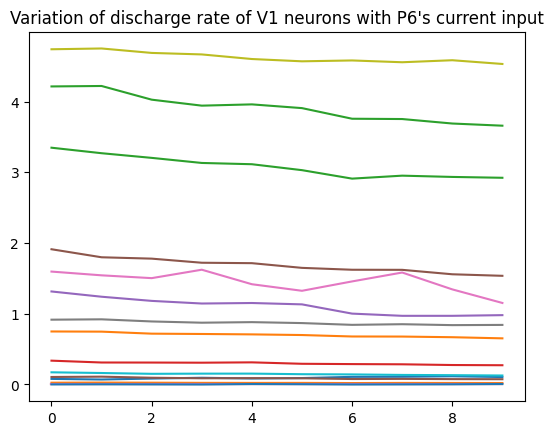

input_pop= V6
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


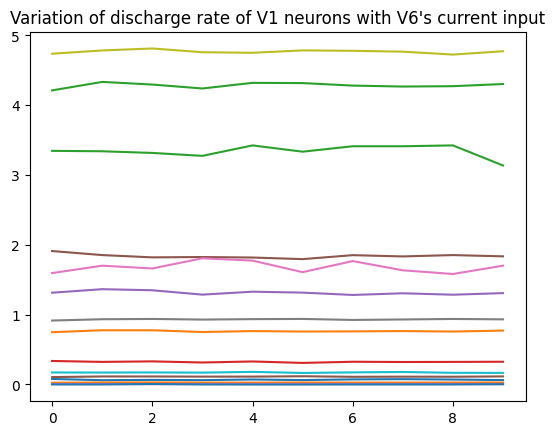

In [3]:
import matplotlib.pyplot as plt

# 连接数据库并提取数据
with dataset.connect(f'sqlite:///{data_path}/dataset.db') as db:
    for input_pop in pop_list_norm:
        print("input_pop=",input_pop)
        for param_name in pop_list_norm:
            value_k_list = []
            rate_k_list = []

            # 遍历 k 值
            for k in range(10):
                if len(list(db[input_pop+'connection'].find(param_value=k))) > 0:
                    
                    # value_k_list.append(k)
                    value_k = db[input_pop+'connection'].find(param_value=k)
                    for row in value_k:
                        print("k=",k)
                        # if row[param_name] < 100:
                        if True:
                            value_k_list.append(k)
                            rate_k_list.append(row[param_name])

            # print("rate_k=",rate_k_list)
        
            plt.plot(value_k_list, rate_k_list,label=f'{param_name} Rate')
            # 可视化图像
            # plt.figure(figsize=(10, 6))
        plt.title("Variation of discharge rate of V1 neurons with {}'s current input".format(input_pop))
        plt.show()
        # plt.savefig('/home/liugangqiang/fig/variation of rate with {}'.format(input_pop))
        # plt.close()

input_pop= H1


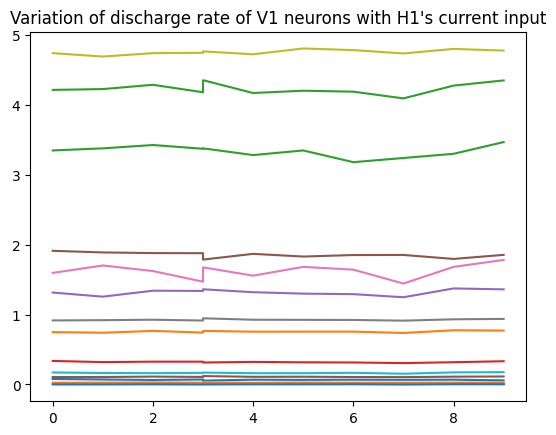

input_pop= E23


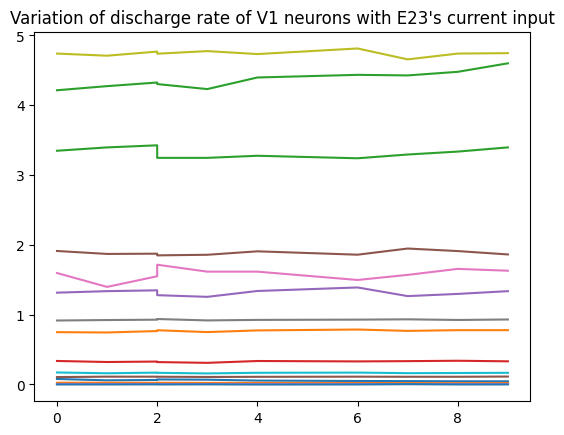

input_pop= S23


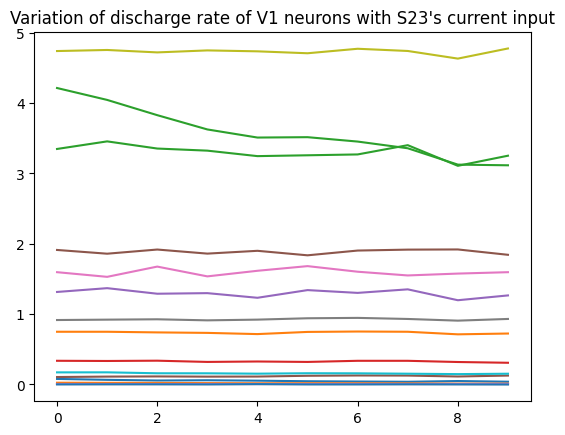

input_pop= P23


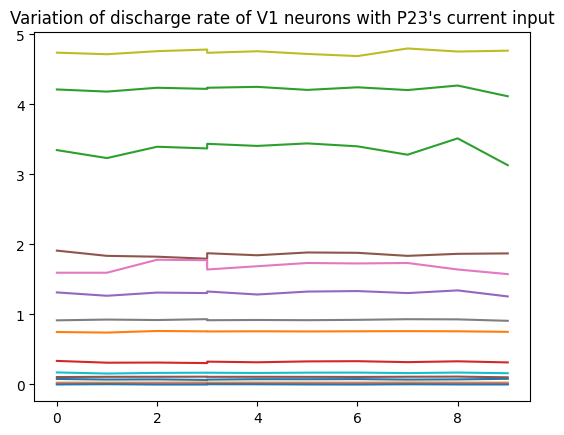

input_pop= V23


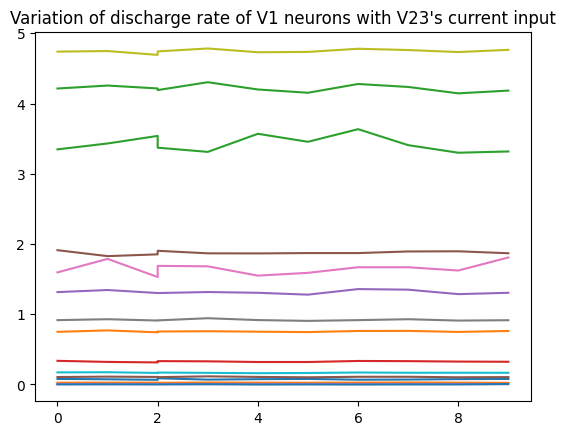

input_pop= E4


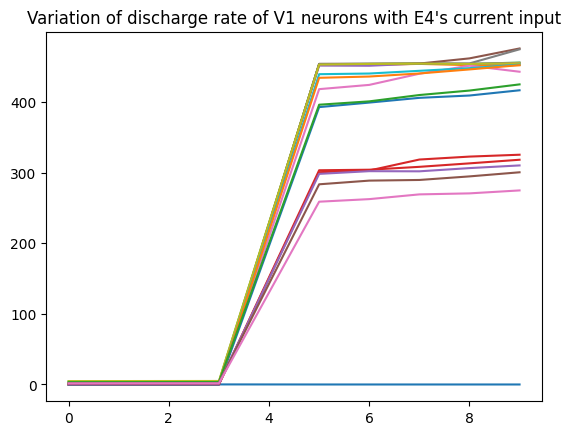

input_pop= S4


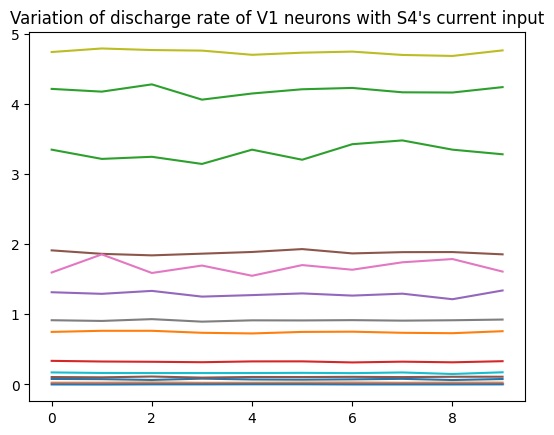

input_pop= P4


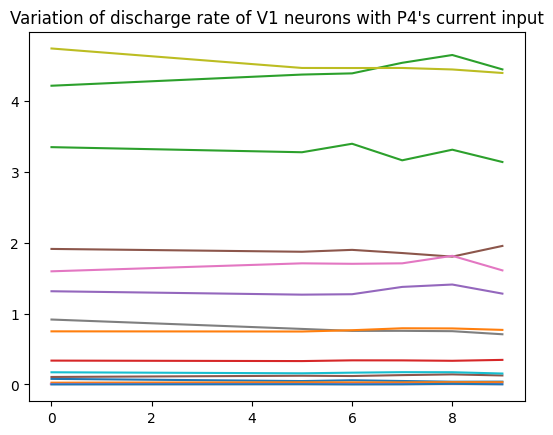

input_pop= V4


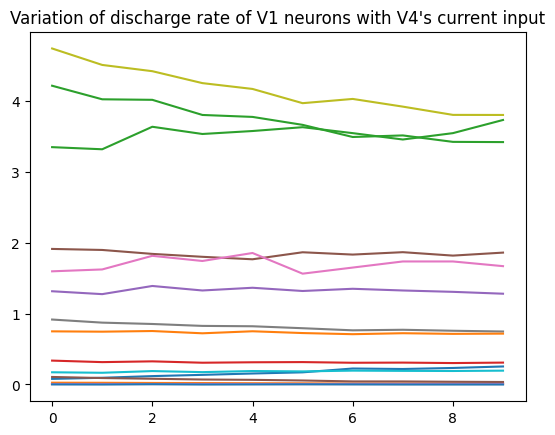

input_pop= E5


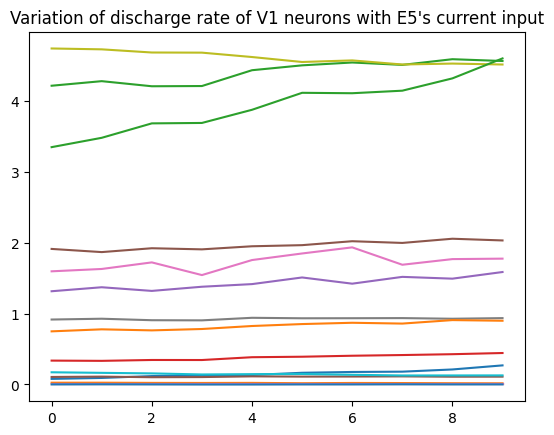

input_pop= S5


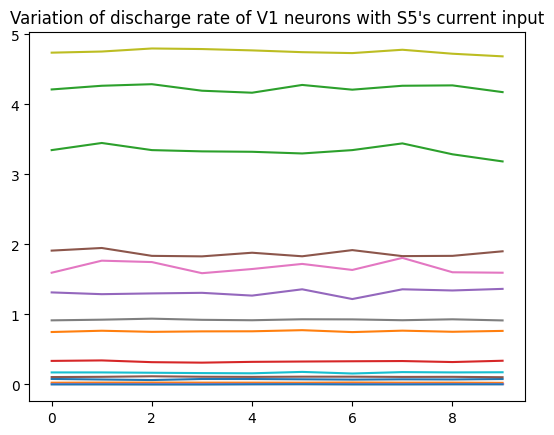

input_pop= P5


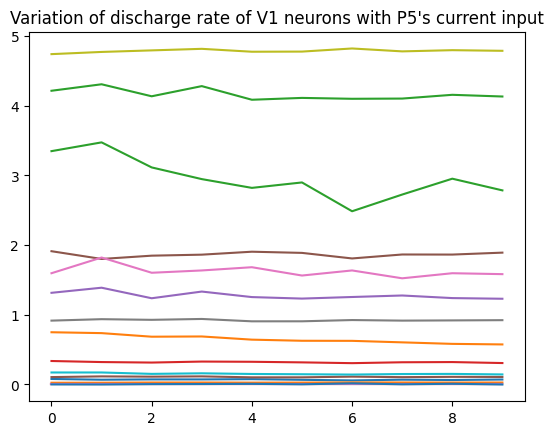

input_pop= V5


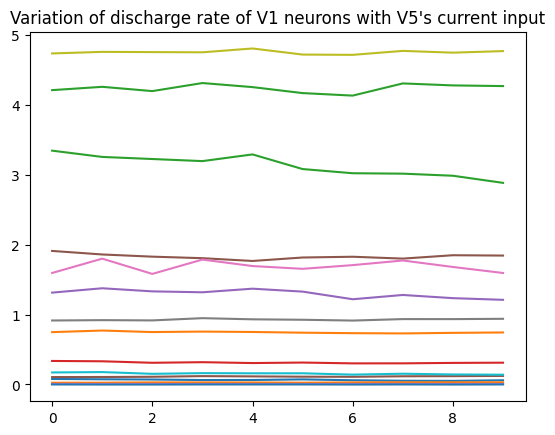

input_pop= E6


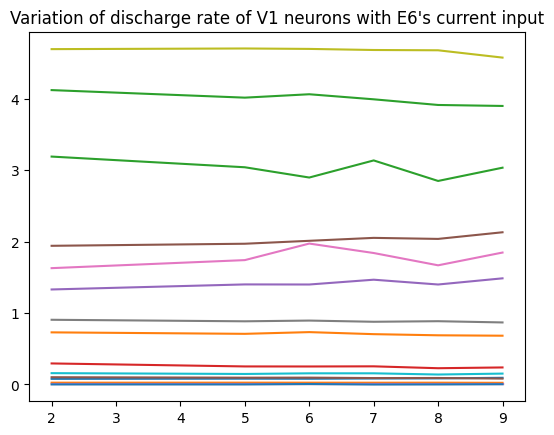

input_pop= S6


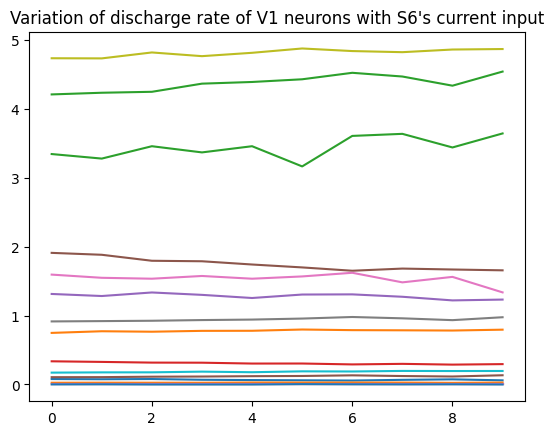

input_pop= P6


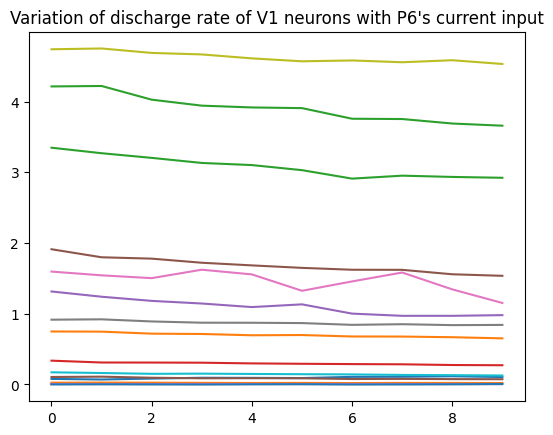

input_pop= V6


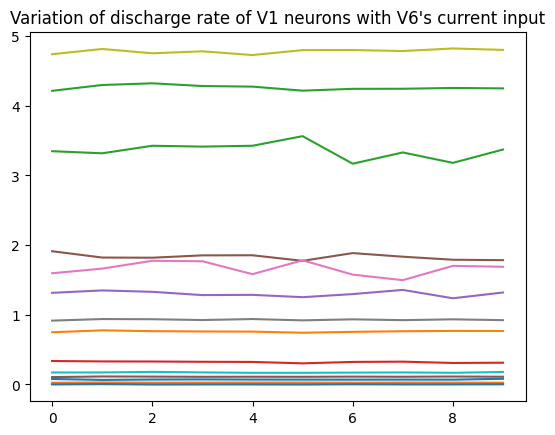

In [3]:
import matplotlib.pyplot as plt

# 连接数据库并提取数据
with dataset.connect(f'sqlite:///{data_path}/dataset.db') as db:
    for input_pop in pop_list_norm:
        print("input_pop=",input_pop)
        for param_name in pop_list_norm:
            value_k_list = []
            rate_k_list = []

            # 遍历 k 值
            for k in range(10):
                if len(list(db[input_pop+'conprecent'].find(param_value=k))) > 0:
                    
                    # value_k_list.append(k)
                    value_k = db[input_pop+'conprecent'].find(param_value=k)
                    for row in value_k:
                        # print("k=",k)
                        # if row[param_name] < 100:
                        if True:
                            value_k_list.append(k)
                            rate_k_list.append(row[param_name])

            # print("rate_k=",rate_k_list)
        
            plt.plot(value_k_list, rate_k_list,label=f'{param_name} Rate')
            # 可视化图像
            # plt.figure(figsize=(10, 6))
        plt.title("Variation of discharge rate of V1 neurons with {}'s current input".format(input_pop))
        plt.show()
        # plt.savefig('/home/liugangqiang/fig/variation of rate with {}'.format(input_pop))
        # plt.close()

In [11]:
table = db['delay_i']
for row in table:
    print(row['param_value'],row['label'])

4 dc5ca2e92bbc92326f82659223b9f03f
2 d9b98403ca4d5c7a83f0061f4ea09b56
1 0316ea5e5ce2a33475d72dca1c89d64b
3 d4c207a3e75425c6aa6a7e4df53665a8
0 4eaaba945e54897dd1387372c0b0618f
8 ab5a57c9a0330b8ca7df38241fc0e1bb
5 6441f23d6ca5be4575d12b3d4b1f8de4
7 6b731337b70c02fb981f6e18a6c982c6
6 5af7a7c92361decd442557f9182e3102
9 e05c2fd4fcef0fabb02648e7afb57681


k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


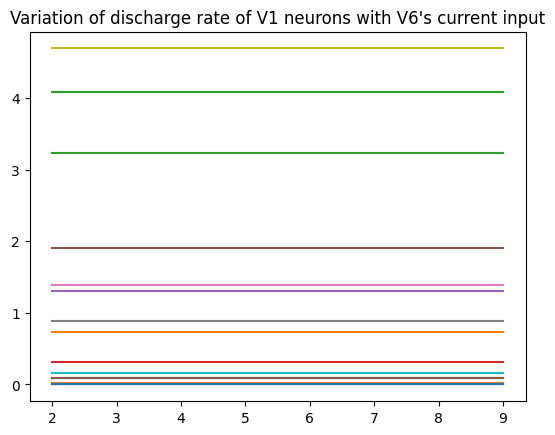

In [5]:
import matplotlib.pyplot as plt

# 连接数据库并提取数据
with dataset.connect(f'sqlite:///{data_path}/dataset.db') as db:
    # for input_pop in pop_list_norm:
    #     print("input_pop=",input_pop)
    
    param = 'delay_e'
    
    if True:
        for param_name in pop_list_norm:
            value_k_list = []
            rate_k_list = []

            # 遍历 k 值
            for k in range(10):
                if len(list(db[param].find(param_value=k))) > 0:
                    
                    # value_k_list.append(k)
                    value_k = db[param].find(param_value=k)
                    for row in value_k:
                        print("k=",k)
                        # if row[param_name] < 100:
                        if True:
                            value_k_list.append(k)
                            rate_k_list.append(row[param_name])

            # print("rate_k=",rate_k_list)
        
            plt.plot(value_k_list, rate_k_list,label=f'{param_name} Rate')
            # 可视化图像
            # plt.figure(figsize=(10, 6))
        plt.title("Variation of discharge rate of V1 neurons with {}'s current input".format(input_pop))
        plt.show()
        # plt.savefig('/home/liugangqiang/fig/variation of rate with {}'.format(input_pop))
        # plt.close()

In [9]:
import matplotlib.pyplot as plt

# 连接数据库并提取数据
with dataset.connect(f'sqlite:///{data_path}/dataset.db') as db:
    # for input_pop in pop_list_norm:
    #     print("input_pop=",input_pop)
    for param in ['delay_e','delay_i']:
        print(len(list(db[param])))


0
0
